In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import json
import sys
import emoji
import numpy as np
import datetime
from collections import Counter


In [2]:
emoji.demojize('😂')

':face_with_tears_of_joy:'

In [6]:
consumer_key = 'usR2qe5HtTX0eyDCRhQOufHTa'
consumer_secret = 'MQ7g4HISSRNP0Ib9H80Avv1BxlOqIjKB8CmqlRvKvs8c6JPhhH'
access_key = '798640585359982592-PivpURRxl6hL92t8cb02DIH8N2c1ax0'
access_secret = 'dqADIUXYWt3hgVWI1fjjTsA1wMGJ1uyEBRgaGGlnU9yy9'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [7]:
# get all tweet from a user
def get_tweets(username,number_of_tweets,page):
         
        # Authorization to consumer key and consumer secret
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
        # Access to user's access key and access secret
        auth.set_access_token(access_key, access_secret)
 
        # Calling api
        api = tweepy.API(auth)
 
        # 200 tweets to be extracted
        tweets = api.user_timeline(screen_name=username,count = number_of_tweets,page=page)
 
        # Empty Array
        tmp=[] 
 
        # create array of tweet information: username, 
        # tweet id, date/time, text
        tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created 
        for j in tweets_for_csv:
 
            # Appending tweets to the empty array tmp
            tmp.append(j) 
 
        # Printing the tweets
        print(tmp)
        return tmp
 

In [8]:
def get_tweet(screen_name):
    ID = []
    texts = []
    possibly_sensitive = []
    favorited = []
    favorite_count = []
    retweet_count = []
    retweeted = []
    truncated = []
    created_at = []
    for page in range(1,20):
        tweets = api.user_timeline(screen_name=screen_name,count = 500,page=page)
        ID += [tweet.id for tweet in tweets]
        favorited += [tweet.favorited for tweet in tweets]
        favorite_count += [tweet.favorite_count for tweet in tweets]
        retweet_count += [tweet.retweet_count for tweet in tweets]
        retweeted += [tweet.retweeted for tweet in tweets]
        truncated += [tweet.truncated for tweet in tweets]
        texts += [tweet.text for tweet in tweets]
        created_at += [tweet.created_at for tweet in tweets]
        print('number of tweets:',len(texts))
    return ID,texts,possibly_sensitive,favorited,favorite_count,retweet_count,retweeted,truncated,created_at

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)


def word_frequency(word):
    count = 0
    for text in texts:
        if word in text.lower().split():
            count += 1
    return count / len(texts)

In [33]:
ID,texts,possibly_sensitive,favorited,favorite_count,retweet_count,retweeted,truncated,created_at = get_tweet('TyquanAssassin')

number of tweets: 194
number of tweets: 386
number of tweets: 571
number of tweets: 767
number of tweets: 959
number of tweets: 1152
number of tweets: 1345
number of tweets: 1538
number of tweets: 1730
number of tweets: 1924
number of tweets: 2119
number of tweets: 2313
number of tweets: 2509
number of tweets: 2704
number of tweets: 2892
number of tweets: 3090
number of tweets: 3090
number of tweets: 3090
number of tweets: 3090


In [39]:
# create dataframe using tweet data
df_TyquanAssassin = pd.DataFrame({'id':ID,'texts':texts,'favorited':favorited,'favorite_count':favorite_count,'retweet_count':retweet_count,'retweeted':retweeted,'truncated':truncated,"created_at":created_at})

# Word Cloud

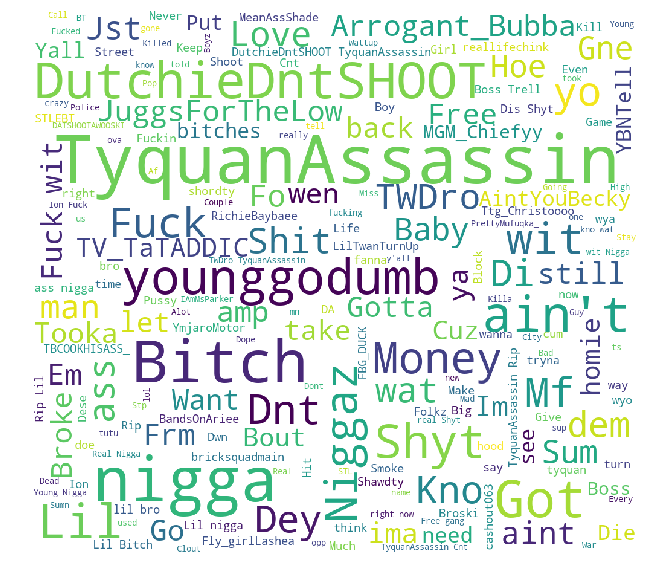

In [40]:
### word cloud
all_texts = ''.join(texts)

all_texts = all_texts.replace('dat','')
all_texts = all_texts.replace('da','')
all_texts = all_texts.replace('Da','')
all_texts = all_texts.replace('RT','')

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1000, height=900, margin=2).generate(all_texts)

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [68]:
all_texts = all_texts.lower()
c = Counter(all_texts.split())
c.most_common()

[('i', 659),
 ('u', 572),
 ('a', 459),
 ('my', 455),
 ('n', 391),
 ('on', 320),
 ('me', 296),
 ('lil', 279),
 ('bitch', 264),
 ('2', 258),
 ('t', 231),
 ('@tyquanassassin', 229),
 ('up', 216),
 ('wit', 211),
 ('it', 210),
 ('fuck', 193),
 ('niggas', 186),
 ('got', 181),
 ('no', 178),
 ('shyt', 174),
 ('get', 172),
 ('to', 165),
 ('“@tyquanassassin:', 164),
 ('nigga', 161),
 ("ain't", 159),
 ('of', 151),
 ('like', 148),
 ('niggaz', 144),
 ('we', 141),
 ('you', 140),
 ('"@tyquanassassin:', 139),
 ('ass', 136),
 ('money', 132),
 ('be', 132),
 ('kno', 132),
 ('but', 125),
 ("i'm", 123),
 ('do', 120),
 ('@dutchiedntshoot:', 119),
 ('dnt', 118),
 ('the', 117),
 ('all', 117),
 ('dis', 116),
 ('rip', 112),
 ('yo', 110),
 ('out', 106),
 ('was', 104),
 ('dey', 101),
 ('dem', 97),
 ('💯', 90),
 ('jst', 86),
 ('mf', 84),
 ('for', 83),
 ('in', 83),
 ('tooka', 80),
 ('sum', 77),
 ('is', 77),
 ('bout', 77),
 ('wat', 75),
 ('love', 74),
 ('gne', 73),
 ('real', 72),
 ('shit', 72),
 ('so', 72),
 ('if', 7

In [104]:
print(word_frequency('bitch') + word_frequency('bitches'))
print(c['bitch'] + c['bitches'])

0.09579288025889968

In [114]:
print(word_frequency('fuck') + word_frequency('fucking') + word_frequency('fucked') + word_frequency('fuckin'))
print(c['fuck']+c['fucking']+c['fucked']+c['fuckin'])

0.09288025889967637
286


In [115]:
print(word_frequency('niggas') + word_frequency('nigga') + word_frequency('niggz'))
print(c['niggas']+c['nigga']+c['niggz'])

0.10582524271844661
347


In [116]:
print(word_frequency('shyt') + word_frequency('shit') + word_frequency('shits'))
print(c['shyt']+c['shit']+c['shits'])

0.07896440129449837
247


In [117]:
print(word_frequency('ass') + word_frequency('asshole'))
print(c['ass']+c['asshole'])

0.04498381877022654
136


# Extract Emoji

In [46]:
emojis = extract_emojis(all_texts)
emojis_text = emoji.demojize(emojis)
emojis

'\U0001f919👑😤😩💯💯💯💯🗣🕊‼🎈❤👑😤😩😔😈🙏😷😈😩💯🙏👭😤💍👭😔💔👼💯😪😒😪😤💯😈💩😈🎈🎊🎉👼👼👼😤😈💯💯😔🙏💯😈💯💯💯😎👟💰💸👕👖💯🔥🔥🔫💂👿💯😒🙅💯🙏💯😔🙏🙌🔫💯💯💯💯🙌🔫💯👿💸💸💸💯😂😼😈👑🙏💉😼💯👆😂💯😈😎😂😂😂🙌🔫😶💯😔🙏💯™💯😎💰😈💯💯💯💰😈💯💯😈🙅💰💯😎😂😎💯😈😈💯🅾👮🐷🚔🙅🙅💯🅾😈😂😸💉💉😔🙏💯👑💯🅾💰💥🔫👮🐷🚔😔🙏💸🏧👑✊👨💀💀💀💀🙌🔫😶💯💯😶😶😶😂🙌🔫😶😶😷💯🙌🔫😶💯😂😼🙅🙅👑💯💯😶💯💯💩🙅😔🙏💯🙅🙅💯💯🙏🙏😈💯😈🔥💯👿😒💰💸💯👏💂👿🙏💯💂🔫❓🙅😶😷😈💰💯🙏🙏💯💯🆓🅰💯🚶💰😈😔😔😶😷🙅🙅🙅🙅🔫😈🙅🙅😼😈💯💯💯💯💯😂😂😁😜💦😸😼✋💪💪💯💯💂🐭🙅😈🔥🔥🔫🙅🙅💯🙅😶😷😷💯💯💯💯💯💯💯💯💯😔🙏😷💯😔🙅🙅🙅🙅👿🙏💯🙏💯😔🙏💉🙅🚨🚔👮🔫😔🙏💉😈🍋😱🔫💯👿👿💭💭👮🔫🙅😴😩😩😂😓👿😷😷😂💯💯🙏💯💯💯💯💯🙏💯💯💯💰💸💨😈💯😈💯😔😔🙏🏀😈👿💰💸💨😈💯😘😘👼🙏💯💯💯😈😔💯💯😒🔫💯💯💯💯👿💯👿💯🙏👿😪👿🙏💯😫🙏😈🙏💯😂😒💯💯💯🙏😔🙏💯😒🔓🙏💯💯💯🙅🙅💯😪💯🐷💉💩👿💯😈🙏😷💯👏💩🙅🔫💯🚈🚅🚄🚝🚞💰💰💰💰💰✈💸💸🔫🚬🔫😈💯😈😎😼💰💸😤👿💯🕦💯😈😈🐍💩🔃💰💸💸💯😎💸💸✋😒✋💩😂😼😂😸💂❓👋👋👶👧😈💯😸😂😂💯🔫💯💨🔫😈💩😈😈🙅😷💸💸🔥💩🔫😷💯😸😂😩💸💸🔥💩🔫😷💯💯💨😷💰💰😎😼💯💰💸💸💸😼😎👶😼💰💰😘😘😘😼🙏💯👶👧🚨🚔🚔💯😻😼😘💯😘💨🔫😈😈😂😂💩🐍💩🔃💰💸💸💯😤😒🔓🙏💯🔫💥💁😼💭💰💸💸💸😼💯💰💯👿♨🐅🐍🙌🔫💯😴💯💰👄👌✊😼💯💩⛅⛅😤😒😩💩💸💸💸🙅💸💸💯💰💸💸🔫💯💊😌💯😷😶💥🔫💯✔🙅🙅😈💯💯😻😻😼💯🍰💯🙅🙅💸😩💯😂😂😩💭💲💲💲💲😂😂😂😈🙅😈😼🔱💰💯🙅🙅🙅💯💯👌😒😼😻😻😻😘😘💯😈💯😸😼💩💩😂😸🚙💪💰⛽🍃💯😘😼✂💩😎💸💸✔🙅🙅😈😼😳👊❓💩💩💩💩💰😈😼🙅💩💯🙅💪💯😂😂😂😸👶💯😈💰🔫💊💯🙏😭👼👶👧😼💰💴💵💷💶💳💸🙅🙅💢🔫💯😎😘😻😼💯💰💰🙅🙅😈💯💸💸💸👶😘😼😂🙅🔓💯💯😈🙅🔓💯💯😼😈😼🙏💯🙏⛽🍃💨🍹🍷🍇🍼🎊🎉🎈💃💃👄💦🍆💯😤😈💰💰🔫😒👿🔝💯💯💯😷💯💪😒✋😈⛅💸💯👶👼🙏💰💰💰🙏💯🙏👼💯😔😔💯😼💯💯😼😈😂🔫👿😼💯🔫👿🆓👀🏀💯💯🆓👀🏀💯🆓👀🏀💯💯💉💯😂😈😺😼🔫💯😈😂😡😎💉🙏💯😼🙏💯💯💯💯💯😼😷😈😒💯😂😺💰🏃🏃😌😼😂😂😂💯💯😈💩💉👏💩🔫😈💯👏💩🔫😈💯💯🔫😼💯😂😂😂😂😩😆😆🔫😈😩😩😂😂😂😂😂🔫😼😈🔫😈👿🙅😼😈😳😒💯😳😒💯🔫😈🔫😈💰🔫💯🔫😈💰🔫💯🙏💴💵😈😼💉💯😈💯🙏💰😈🙏💯💯🙏💯🙏💯💯💯💯💯

In [47]:
emojis_list = []
for i in emojis:
    emojis_list.append(i)
c_emojis_list = Counter(emojis_list)

In [48]:
list(c_emojis_list.items())  # why need list to make pandas dataframe

[('💔', 2),
 ('😈', 269),
 ('🌵', 2),
 ('⚡', 2),
 ('🎲', 2),
 ('🔌', 2),
 ('💃', 23),
 ('🍂', 13),
 ('💜', 1),
 ('🚝', 1),
 ('😩', 50),
 ('🐑', 1),
 ('😝', 5),
 ('🍭', 4),
 ('✊', 10),
 ('👨', 1),
 ('⛅', 3),
 ('✋', 34),
 ('💸', 286),
 ('🅱', 1),
 ('✅', 2),
 ('🚄', 2),
 ('\U0001f919', 1),
 ('👟', 7),
 ('🆖', 10),
 ('😄', 1),
 ('🚭', 1),
 ('💉', 12),
 ('✨', 3),
 ('🙋', 1),
 ('🎊', 2),
 ('🎈', 3),
 ('🐭', 1),
 ('👭', 4),
 ('🍒', 2),
 ('🔴', 1),
 ('👅', 1),
 ('🏃', 60),
 ('😺', 2),
 ('🚈', 1),
 ('🚫', 1),
 ('🔔', 4),
 ('😍', 14),
 ('🔃', 2),
 ('🚲', 3),
 ('💀', 12),
 ('🆒', 11),
 ('😓', 2),
 ('🔱', 1),
 ('👩', 1),
 ('🚍', 1),
 ('😳', 15),
 ('🚗', 3),
 ('😸', 32),
 ('💋', 1),
 ('😬', 5),
 ('🅰', 11),
 ('👋', 6),
 ('🙅', 216),
 ('⌚', 1),
 ('🌴', 1),
 ('✔', 9),
 ('😜', 2),
 ('😶', 20),
 ('😆', 2),
 ('😥', 1),
 ('👹', 1),
 ('🎤', 6),
 ('🚅', 1),
 ('🔪', 2),
 ('🔯', 2),
 ('❓', 24),
 ('🚶', 9),
 ('✂', 4),
 ('🎉', 2),
 ('🌳', 1),
 ('👮', 16),
 ('🏧', 4),
 ('👎', 5),
 ('👍', 6),
 ('🔥', 29),
 ('🍇', 5),
 ('🙎', 2),
 ('⭕', 1),
 ('💘', 1),
 ('🚬', 4),
 ('🔕', 5),
 ('❤', 5),

In [49]:
df_emoji = pd.DataFrame(list(c_emojis_list.items()),columns=['emoji','count'])
df_emoji['frequency'] = df_emoji['count'] / df_emoji['count'].sum()
df_emoji = df_emoji.sort_values('count',ascending=False)
df_emoji = df_emoji.reset_index(drop=True)
df_emoji.style.format({
    'frequency': '{:,.2%}'.format,})



,emoji,count,frequency
0,💯,1179,22.51%
1,😂,290,5.54%
2,💸,286,5.46%
3,💰,279,5.33%
4,🔫,275,5.25%
5,😈,269,5.14%
6,🙅,216,4.12%
7,💪,167,3.19%
8,🙏,164,3.13%
9,😷,124,2.37%


# emoji timeseriers

In [12]:
df_TyquanAssassin_emoji1 = df_TyquanAssassin[df_TyquanAssassin['texts'].str.contains("💯")]

In [26]:
def emoji_count(emoji,df_name):    
    count_of_emoji = []
    for text in df_name.texts:
        count_of_emoji.append(text.count(emoji))
    return count_of_emoji


In [14]:
count_of_emoji1 = emoji_count('💯',df_TyquanAssassin)
df_TyquanAssassin['count_of_emoji1'] = count_of_emoji1

In [15]:
df_TyquanAssassin['date'] = [i.date() for i in df_TyquanAssassin.created_at]
grouped_by_date = df_TyquanAssassin.groupby(df_TyquanAssassin.date).sum()
grouped_by_date.head()

,favorite_count,favorited,id,retweet_count,retweeted,truncated,count_of_emoji1
date,,,,,,,
2014-02-04,14.0,False,3.789541e+19,99.0,False,False,27.0
2014-02-05,8.0,False,9.050653e+18,86.0,False,False,14.0
2014-02-06,19.0,False,1.250988e+19,45.0,False,False,10.0
2014-02-07,12.0,False,1.511469e+19,79.0,False,False,10.0
2014-02-08,8.0,False,1.253336e+19,201.0,False,False,10.0


In [16]:
year_2014 = grouped_by_date[np.array([i.year == 2014 for i in grouped_by_date.index])]


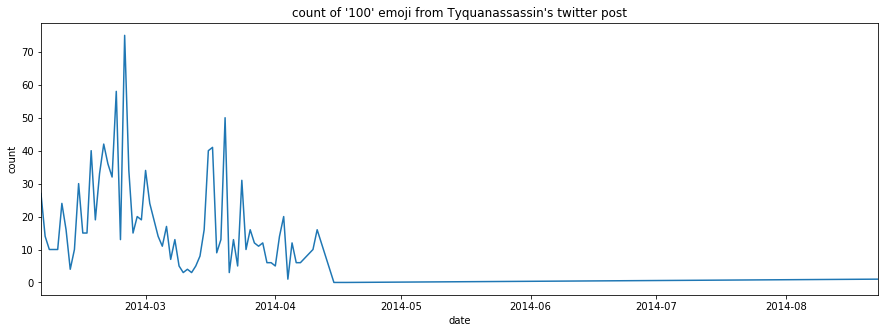

In [19]:
plt.figure(figsize=(15,5))
year_2014.count_of_emoji1.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of \'100\' emoji from Tyquanassassin\'s twitter post')
plt.show()


In [20]:
count_of_emoji2 = emoji_count('😂',df_TyquanAssassin)
df_TyquanAssassin['count_of_emoji2'] = count_of_emoji2
df_TyquanAssassin['date'] = [i.date() for i in df_TyquanAssassin.created_at]
grouped_by_date = df_TyquanAssassin.groupby(df_TyquanAssassin.date).sum()
grouped_by_date.head()
year_2014 = grouped_by_date[np.array([i.year == 2014 for i in grouped_by_date.index])]


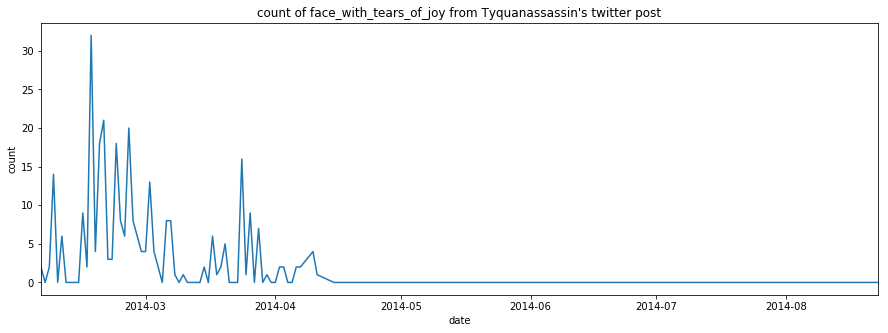

In [22]:
plt.figure(figsize=(15,5))
year_2014.count_of_emoji2.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of face_with_tears_of_joy from Tyquanassassin\'s twitter post')
plt.show()

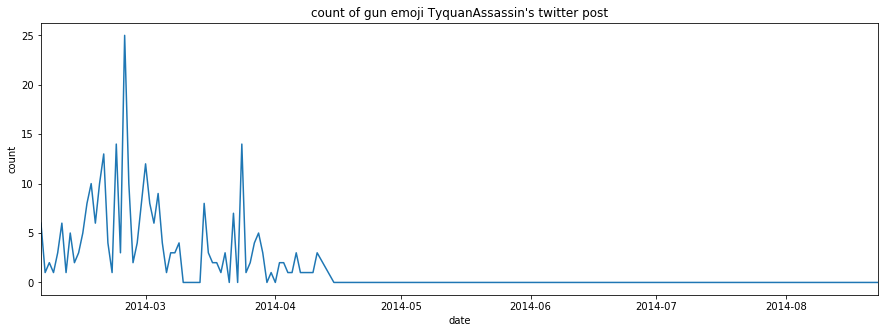

In [23]:
count_of_emoji3 = emoji_count('🔫',df_TyquanAssassin)
df_TyquanAssassin['count_of_emoji3'] = count_of_emoji3
df_TyquanAssassin['date'] = [i.date() for i in df_TyquanAssassin.created_at]
grouped_by_date = df_TyquanAssassin.groupby(df_TyquanAssassin.date).sum()
year_2014 = grouped_by_date[np.array([i.year == 2014 for i in grouped_by_date.index])]
plt.figure(figsize=(15,5))
year_2014.count_of_emoji3.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of gun emoji TyquanAssassin\'s twitter post')
plt.show()

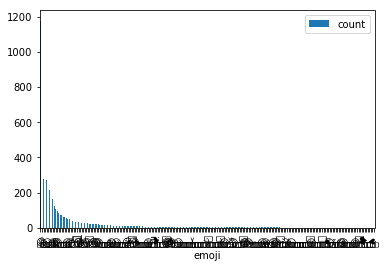

In [326]:
plt.figure(num=1, figsize=(40, 10), dpi=80, facecolor='w', edgecolor='k')
df_emoji.plot(x='emoji',y='count',kind = "bar")
plt.show()

# time series

In [16]:
df.head()

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated
0,2018-04-06 03:10:57,1,False,982093271848583168,1,False,My Boy #SuzyyTweet 🤙🏾 https://t.co/pEVbTwQlWq,False
1,2018-01-21 08:46:24,0,False,954998601645809664,4,False,RT @TyquanAssassin: UNOs4Life 👑😤 @GKirahAssass...,False
2,2018-01-21 08:44:36,0,False,954998150682628097,1291,False,RT @FBG_DUCK: Rip @FREDOSANTANA300. Aint Never...,False
3,2018-01-21 08:44:26,0,False,954998107288363008,91,False,RT @FBG_DUCK: &amp; Its Still FUCK DA OPPS 💯💯 ...,False
4,2018-01-21 08:43:54,14,False,954997972130988034,6,False,It’s A Real Nigga Holiday 🗣 1:21 🕊 HBD K.I ‼️🎈...,False


In [17]:
# create new column date
df['date'] = [i.date() for i in df.created_at]

In [18]:
grouped_by_date = df.groupby(df.date).count()
grouped_by_date.sort_values('created_at',ascending=False).head(10)

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,date
date,,,,,,,,,
2014-02-16,184,184,184,184,184,184,184,184,184
2014-03-20,135,135,135,135,135,135,135,135,135
2014-02-24,110,110,110,110,110,110,110,110,110
2014-02-19,94,94,94,94,94,94,94,94,94
2014-02-04,88,88,88,88,88,88,88,88,88
2014-02-25,86,86,86,86,86,86,86,86,86
2014-03-17,85,85,85,85,85,85,85,85,85
2014-02-20,81,81,81,81,81,81,81,81,81
2014-02-18,80,80,80,80,80,80,80,80,80


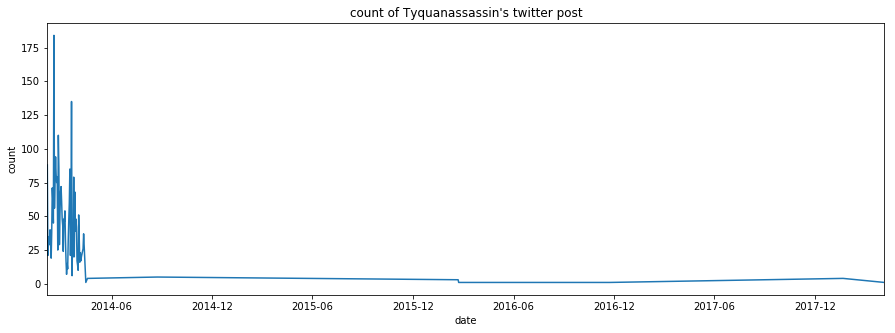

In [23]:
plt.figure(figsize=(15,5))
grouped_by_date.created_at.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of Tyquanassassin\'s twitter post')
plt.show()



In [25]:
year_2014 = grouped_by_date[np.array([i.year == 2014 for i in grouped_by_date.created_at.index])]


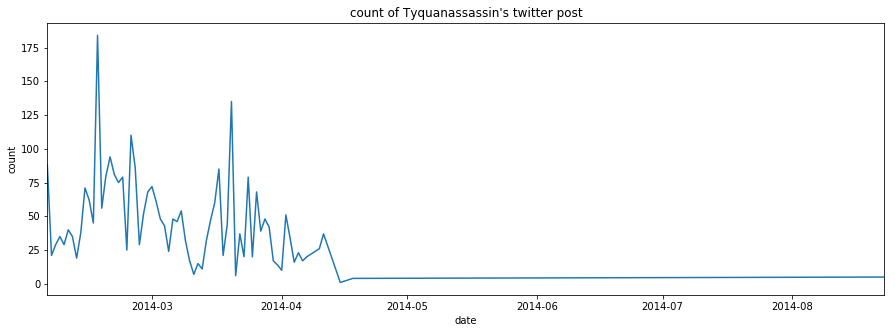

In [26]:
plt.figure(figsize=(15,5))
year_2014.created_at.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of Tyquanassassin\'s twitter post')
plt.show()

# QC_MrSwapItOut

In [118]:
ID,texts,possibly_sensitive,favorited,favorite_count,retweet_count,retweeted,truncated,created_at = get_tweet('QC_MrSwapItOut')

number of tweets: 194
number of tweets: 392
number of tweets: 585
number of tweets: 782
number of tweets: 982
number of tweets: 1181
number of tweets: 1380
number of tweets: 1576
number of tweets: 1771
number of tweets: 1969
number of tweets: 2162
number of tweets: 2359
number of tweets: 2556
number of tweets: 2749
number of tweets: 2944
number of tweets: 3144
number of tweets: 3175
number of tweets: 3175
number of tweets: 3175


In [119]:
df_QC_MrSwapItOut = pd.DataFrame({'id':ID,'texts':texts,'favorited':favorited,'favorite_count':favorite_count,'retweet_count':retweet_count,'retweeted':retweeted,'truncated':truncated,"created_at":created_at})

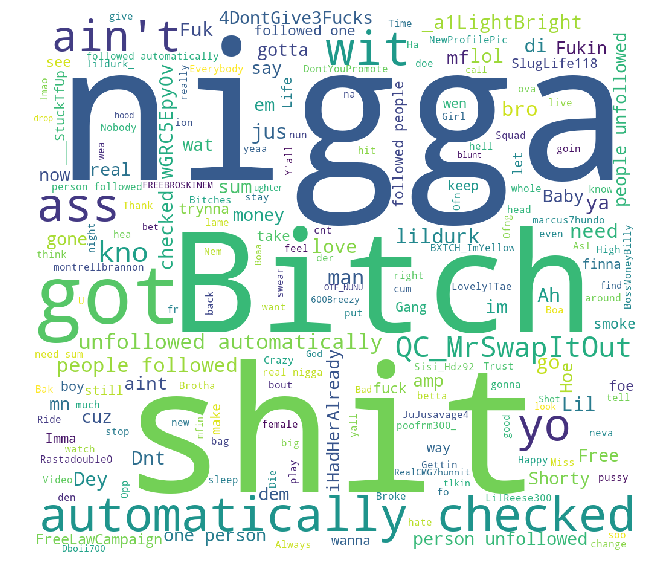

In [120]:
### word cloud 
all_texts = ''.join(texts)
all_texts = all_texts.replace('dat','')
all_texts = all_texts.replace('da','')
all_texts = all_texts.replace('Da','')
all_texts = all_texts.replace('RT','')
all_texts = all_texts.replace('https','')
all_texts = all_texts.replace('co','')

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1000, height=900, margin=2).generate(all_texts)
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [122]:
all_texts = all_texts.lower()
c = Counter(all_texts.split())
c.most_common()

[('i', 452),
 ('me', 413),
 ('u', 336),
 ('a', 316),
 ('my', 313),
 ('to', 305),
 ('on', 236),
 ('in', 193),
 ('shit', 174),
 ('get', 160),
 ('it', 155),
 ('by', 154),
 ('the', 146),
 ('be', 143),
 ('got', 139),
 ('up', 137),
 ('out', 135),
 ('wit', 131),
 ('people', 127),
 ('nigga', 124),
 ('and', 122),
 ('kno', 121),
 ('automatically', 116),
 ('checked', 116),
 ('//', 116),
 ('ass', 116),
 ('bitch', 114),
 ('niggas', 114),
 ('yo', 111),
 ('no', 108),
 ('you', 106),
 ('followed', 105),
 ('an', 105),
 ('like', 103),
 ('all', 103),
 ('lil', 95),
 ("ain't", 92),
 ('need', 92),
 ('we', 91),
 ("i'm", 90),
 ('she', 89),
 ('sum', 88),
 ('one', 88),
 ('of', 87),
 ('unfollowed', 87),
 ('is', 83),
 ('bro', 82),
 ('he', 79),
 ('jus', 78),
 ('ya', 78),
 ('man', 75),
 ('dis', 74),
 ('@lildurk:', 74),
 ('dey', 74),
 ('person', 72),
 ('go', 72),
 ('ah', 68),
 ('n', 67),
 ('y', 64),
 ('im', 64),
 ('but', 63),
 ('not', 63),
 ('was', 62),
 ('real', 61),
 ('dnt', 60),
 ('so', 60),
 ('at', 59),
 ('love',

In [123]:
print(word_frequency('bitch') + word_frequency('bitches'))
print(c['bitch'] + c['bitches'])
print(word_frequency('fuck') + word_frequency('fucking') + word_frequency('fucked') + word_frequency('fuckin'))
print(c['fuck']+c['fucking']+c['fucked']+c['fuckin'])
print(word_frequency('niggas') + word_frequency('nigga') + word_frequency('niggz'))
print(c['niggas']+c['nigga']+c['niggz'])
print(word_frequency('shyt') + word_frequency('shit') + word_frequency('shits'))
print(c['shyt']+c['shit']+c['shits'])
print(word_frequency('ass') + word_frequency('asshole'))
print(c['ass']+c['asshole'])

0.05196850393700787
142
0.01669291338582677
54
0.0768503937007874
238
0.05700787401574803
177
0.03874015748031496
116


In [121]:
emojis = extract_emojis(all_texts)
emojis_text = emoji.demojize(emojis)
emojis

'🤓🤓🎬🍎🙅♂🗣💯😂😂🔥🔥🔥🔥🔥🔥🔥🔥🔥\U0001f91e❤\U0001f985💉🗣💯\U0001f92d\U0001f985🅱☺😍❤\U0001f91e❤\U0001f985🗣💯🗣💯🅿💯🅿🔥🔥🔥🔥‼💙🎒💙🎤💯\U0001f932🏚💰🅱💤🗣🗣💯💯💯🅱💤\U0001f985\U0001f985\U0001f985😂\U0001f937♂🤔💯⁉❓\U0001f928\U0001f926♂\U0001f923💀💀💀🍀😩😭💯💪\U0001f937♂👌💪🙌😌💯❤\U0001f91e🖕🖕😂😂😂😂😂😂😂\U0001f9e2💯💯💯💯💯👮💥💥💥🔫😈🙏🙏🙏\U0001f926♂\U0001f926♂💯💯\U0001f937♂😎😏😏👌👌💯💯💯\U0001f926♂\U0001f926♂\U0001f926♂😩\U0001f923\U0001f926♂\U0001f923\U0001f923\U0001f923\U0001f923💪💉\U0001f985☝\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923🔛⛽\U0001f5a4\U0001f985🙏\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923🙏🅿😈😍😍😍😍😏❤❤😍😍❤😭💯💯💯👌\U0001f985\U0001f926♂\U0001f985🙅♀💯🙏💯🅱💤😴\U0001f985🔥\U0001f928🙏🙏🙏‼‼☝\U0001f5a4\U0001f985\U0001f926♂🔛⛽💉\U0001f91e‼‼‼🚀📶📶\U0001f923\U0001f923\U0001f923\U0001f923🤑😎💯\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923\U0001f923🅱👌\U0001f923\U0001f923\U0001f923\U0001f926♂😴💙💦💦😩😩💯😡💯💯🅿\U0001f987👮♀👮👮♀👮🗣😈🅿💯💯💯\U0001f91e⚔💰🔥🔥🔥🔥\U0001f5a4\U0001f926♂\U0001f926♂😍😍😍😍🔥🔥🔥🔥🔥🔥‼😈\U0001f987‼🙏\U0001f926♂\U0001f926♂\U0001f926♂😍😍😍\U0

In [28]:
emojis_list = []
for i in emojis:
    emojis_list.append(i)
c_emojis_list = Counter(emojis_list)
list(c_emojis_list.items())  
df_emoji = pd.DataFrame(list(c_emojis_list.items()),columns=['emoji','count'])
df_emoji['frequency'] = df_emoji['count'] / df_emoji['count'].sum()
df_emoji = df_emoji.sort_values('count',ascending=False)
df_emoji = df_emoji.reset_index(drop=True)
df_emoji.style.format({
    'frequency': '{:,.2%}'.format,})

,emoji,count,frequency
0,😂,496,10.76%
1,💯,468,10.15%
2,😍,273,5.92%
3,🤣,243,5.27%
4,♂,231,5.01%
5,😈,222,4.81%
6,🔥,157,3.40%
7,🙏,124,2.69%
8,🤷,108,2.34%
9,🤦,98,2.13%


In [30]:
count_of_emoji1 = emoji_count('💯',df_QC_MrSwapItOut)
df_QC_MrSwapItOut['count_of_emoji1'] = count_of_emoji1
df_QC_MrSwapItOut['date'] = [i.date() for i in df_QC_MrSwapItOut.created_at]
grouped_by_date = df_QC_MrSwapItOut.groupby(df_QC_MrSwapItOut.date).sum()
grouped_by_date.head()

,favorite_count,favorited,id,retweet_count,retweeted,truncated,count_of_emoji1
date,,,,,,,
2013-12-04,0.0,False,4.083590e+17,0.0,False,False,0.0
2013-12-05,1.0,False,1.633921e+19,20.0,False,False,1.0
2013-12-06,1.0,False,2.453334e+18,11785.0,False,False,0.0
2013-12-07,0.0,False,2.864887e+18,4.0,False,False,0.0
2013-12-08,0.0,False,4.097610e+18,7.0,False,False,0.0


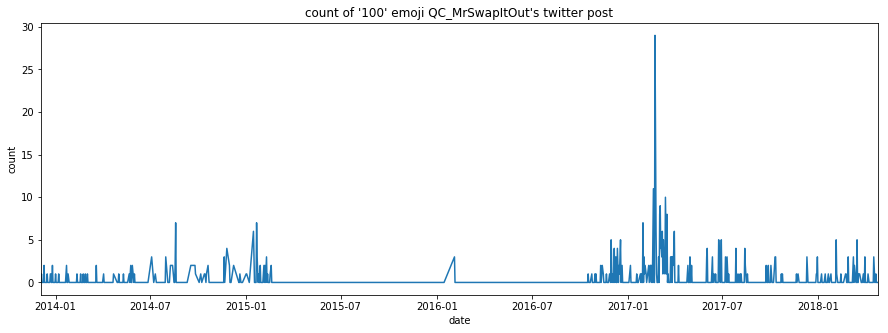

In [31]:
plt.figure(figsize=(15,5))
grouped_by_date.count_of_emoji1.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of \'100\' emoji from QC_MrSwapItOut\'s twitter post')
plt.show()

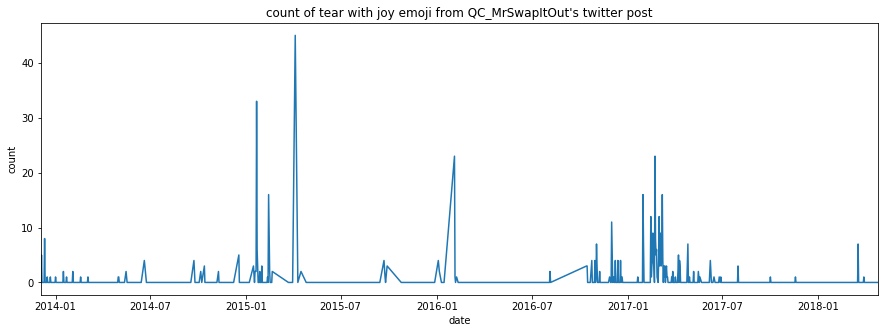

In [41]:
count_of_emoji2 = emoji_count('😂',df_QC_MrSwapItOut)
df_QC_MrSwapItOut['count_of_emoji2'] = count_of_emoji2
df_QC_MrSwapItOut['date'] = [i.date() for i in df_QC_MrSwapItOut.created_at]
grouped_by_date = df_QC_MrSwapItOut.groupby(df_QC_MrSwapItOut.date).sum()
plt.figure(figsize=(15,5))
grouped_by_date.count_of_emoji2.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of tear with joy emoji from QC_MrSwapItOut\'s twitter post')
plt.show()

In [45]:
for text in texts:
    if '😂' in text:
        print(text)

RT @tbc_world: Why your girl think, just becuz you quiet you got an attitude? 😂🤷🏾‍♂️🤔
RT @KevinHart4real: 😂😂😂😂😂😂😂 https://t.co/Zdm6BCIbHn
RT @highimKneirah: @QC_MrSwapItOut Light skin version of u 😂🙃
RT @OtfLilDave: NOBODY CALL You A Hoe MORE Then THE Nigga That Love your Hoe Ass To Death 😂😩
RT @MoodaCrowd_: The real story😂😂😂 https://t.co/DMCbERygqT
RT @GChase_: How did they get all of the reactions in high def? I'm in tears 😂 https://t.co/lLfN79Rwr2
RT @labelmeLynnJ: she lit asl g😂💗💗 @Kylesister__ https://t.co/vypebp8gyk
Summer cum Around n ah nigga Is Always Single😂🤣😩🤦🏾‍♂️
@issabrownbarbie 😂😩 yo ass Soo funny
@issabrownbarbie 😂😂😂 Yeaaa Sum like Dat
I already Kno Y 🤔😋 She Do It so Good 😊 She Trynna Make Ha Nigga Mad 😡😩😂🤦🏾‍♂️
@FlexboyJosh Lul Gay Boy 😂😂
@SHAQ @NBAonTNT U could of took ya ass to wrk Ion Wanna here no nomore Excuses 😂😂🤣🤣🤣🤣
Fukin On Da Same Hoes We Jus Trynna Find Sum 🆕 Bops 😩🤷🏾‍♂️😂
@StrawBerii_KIWI 😩😩😂😂😂😂
@StrawBerii_KIWI I gotchu Girrllllll 😂😂
Wife me 😂😍😍😍😏 https://t.co

In [33]:
df_QC_MrSwapItOut['date'] = [i.date() for i in df_QC_MrSwapItOut.created_at]
grouped_by_date = df_QC_MrSwapItOut.groupby(df_QC_MrSwapItOut.date).count()
grouped_by_date.sort_values('created_at',ascending=False).head(10)

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,date
date,,,,,,,,,
2014-03-04,56,56,56,56,56,56,56,56,56
2013-12-11,54,54,54,54,54,54,54,54,54
2013-12-23,44,44,44,44,44,44,44,44,44
2015-01-21,44,44,44,44,44,44,44,44,44
2017-02-22,42,42,42,42,42,42,42,42,42
2013-12-10,42,42,42,42,42,42,42,42,42
2013-12-05,40,40,40,40,40,40,40,40,40
2017-02-23,37,37,37,37,37,37,37,37,37
2014-02-18,33,33,33,33,33,33,33,33,33


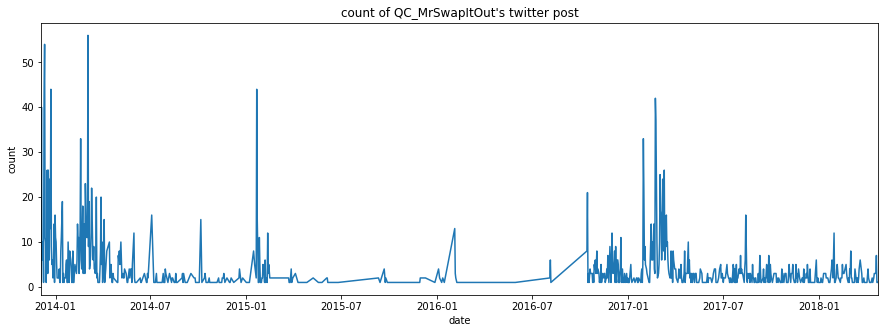

In [34]:
plt.figure(figsize=(15,5))
grouped_by_date.created_at.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of QC_MrSwapItOut\'s twitter post')
plt.show()


# CashJayB

In [124]:
ID,texts,possibly_sensitive,favorited,favorite_count,retweet_count,retweeted,truncated,created_at = get_tweet('CashJayB')

number of tweets: 200
number of tweets: 398
number of tweets: 596
number of tweets: 795
number of tweets: 991
number of tweets: 1186
number of tweets: 1386
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533
number of tweets: 1533


In [125]:
df_CashJayB = pd.DataFrame({'id':ID,'texts':texts,'favorited':favorited,'favorite_count':favorite_count,'retweet_count':retweet_count,'retweeted':retweeted,'truncated':truncated,"created_at":created_at})

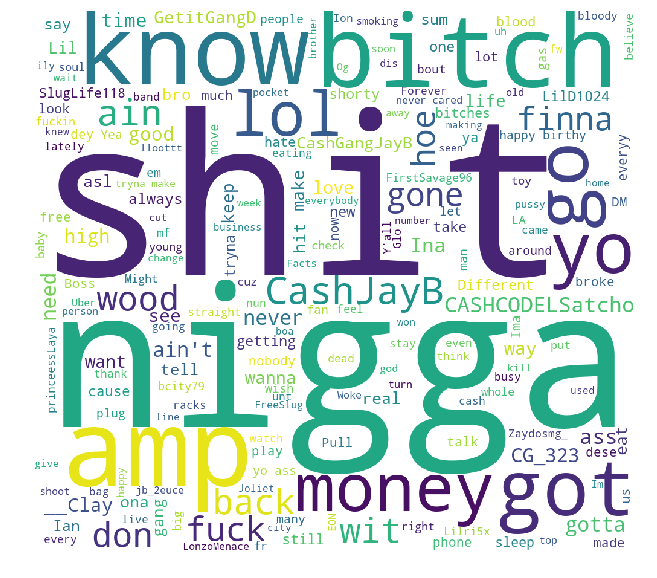

In [126]:
### word cloud 
all_texts = ''.join(texts)
all_texts = all_texts.replace('dat','')
all_texts = all_texts.replace('da','')
all_texts = all_texts.replace('Da','')
all_texts = all_texts.replace('RT','')
all_texts = all_texts.replace('https','')
all_texts = all_texts.replace('co','')
wordcloud = WordCloud(background_color="white",width=1000, height=900, margin=2).generate(all_texts)
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [127]:
all_texts = all_texts.lower()
c = Counter(all_texts.split())
c.most_common()

[('i', 184),
 ('to', 154),
 ('my', 142),
 ('the', 128),
 ('a', 122),
 ('me', 119),
 ('you', 108),
 ('that', 79),
 ('in', 74),
 ('get', 72),
 ('it', 69),
 ('on', 68),
 ('shit', 67),
 ('up', 66),
 ('&amp;', 61),
 ('for', 55),
 ('know', 55),
 ('just', 50),
 ('be', 50),
 ('yo', 48),
 ('no', 48),
 ('bitch', 46),
 ('we', 46),
 ('this', 46),
 ('got', 43),
 ('go', 42),
 ('out', 38),
 ('like', 37),
 ('with', 36),
 ("i'm", 32),
 ('of', 31),
 ('ass', 31),
 ('all', 31),
 ('she', 30),
 ('ina', 30),
 ('niggas', 30),
 ('they', 30),
 ('money', 29),
 ('wit', 29),
 ('i’m', 29),
 ('ain’t', 28),
 ('been', 28),
 ('is', 27),
 ('not', 26),
 ('what', 26),
 ('gone', 26),
 ('back', 25),
 ('some', 25),
 ('@cashjayb:', 24),
 ('when', 24),
 ('at', 24),
 ('them', 24),
 ('can', 24),
 ('don’t', 23),
 ('never', 22),
 ('gotta', 22),
 ('need', 21),
 ('do', 21),
 ('make', 21),
 ("ain't", 20),
 ('lol', 20),
 ('high', 19),
 ('fuck', 19),
 ('can’t', 19),
 ('if', 19),
 ('hoes', 19),
 ('tryna', 18),
 ('off', 18),
 ('bro', 18)

In [129]:
print(word_frequency('bitch') + word_frequency('bitches'))
print(c['bitch'] + c['bitches'])
print(word_frequency('fuck') + word_frequency('fucking') + word_frequency('fucked') + word_frequency('fuckin'))
print(c['fuck']+c['fucking']+c['fucked']+c['fuckin'])
print(word_frequency('niggas') + word_frequency('nigga') + word_frequency('niggz'))
print(c['niggas']+c['nigga']+c['niggz'])
print(word_frequency('shyt') + word_frequency('shit') + word_frequency('shits'))
print(c['shyt']+c['shit']+c['shits'])
print(word_frequency('ass') + word_frequency('asshole'))
print(c['ass']+c['asshole'])

0.043052837573385516
56
0.028049575994781473
30
0.042400521852576645
47
0.046966731898238745
67
0.018917155903457272
31


In [36]:
emojis = extract_emojis(all_texts)
emojis_text = emoji.demojize(emojis)
emojis_list = []
for i in emojis:
    emojis_list.append(i)
c_emojis_list = Counter(emojis_list)
list(c_emojis_list.items())  
df_emoji = pd.DataFrame(list(c_emojis_list.items()),columns=['emoji','count'])
df_emoji['frequency'] = df_emoji['count'] / df_emoji['count'].sum()
df_emoji = df_emoji.sort_values('count',ascending=False)
df_emoji = df_emoji.reset_index(drop=True)
df_emoji.style.format({
    'frequency': '{:,.2%}'.format,})

,emoji,count,frequency
0,😂,103,7.27%
1,🦇,63,4.45%
2,💀,60,4.24%
3,😭,60,4.24%
4,😩,53,3.74%
5,😌,51,3.60%
6,💯,49,3.46%
7,🔥,41,2.90%
8,🖤,40,2.82%
9,♂,39,2.75%


In [37]:
df_CashJayB['date'] = [i.date() for i in df_CashJayB.created_at]
grouped_by_date = df_CashJayB.groupby(df_CashJayB.date).count()
grouped_by_date.sort_values('created_at',ascending=False).head(10)

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,date
date,,,,,,,,,
2017-06-04,22,22,22,22,22,22,22,22,22
2017-09-09,18,18,18,18,18,18,18,18,18
2017-08-26,17,17,17,17,17,17,17,17,17
2017-08-15,17,17,17,17,17,17,17,17,17
2017-08-14,17,17,17,17,17,17,17,17,17
2017-12-03,15,15,15,15,15,15,15,15,15
2017-08-13,15,15,15,15,15,15,15,15,15
2017-08-18,14,14,14,14,14,14,14,14,14
2017-12-02,14,14,14,14,14,14,14,14,14


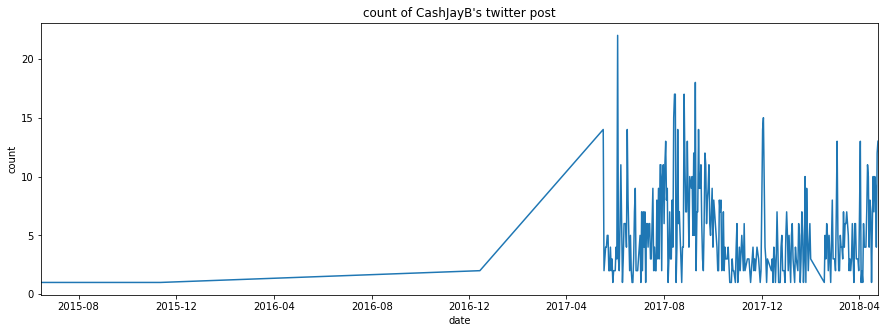

In [38]:
plt.figure(figsize=(15,5))
grouped_by_date.created_at.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of CashJayB\'s twitter post')
plt.show()

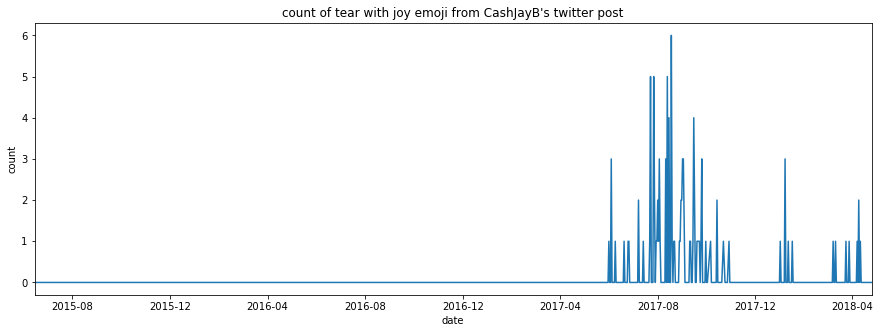

In [43]:
count_of_emoji2 = emoji_count('😂',df_CashJayB)
df_CashJayB['count_of_emoji2'] = count_of_emoji2
df_CashJayB['date'] = [i.date() for i in df_CashJayB.created_at]
grouped_by_date = df_CashJayB.groupby(df_CashJayB.date).sum()
plt.figure(figsize=(15,5))
grouped_by_date.count_of_emoji2.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of tear with joy emoji from CashJayB\'s twitter post')
plt.show()

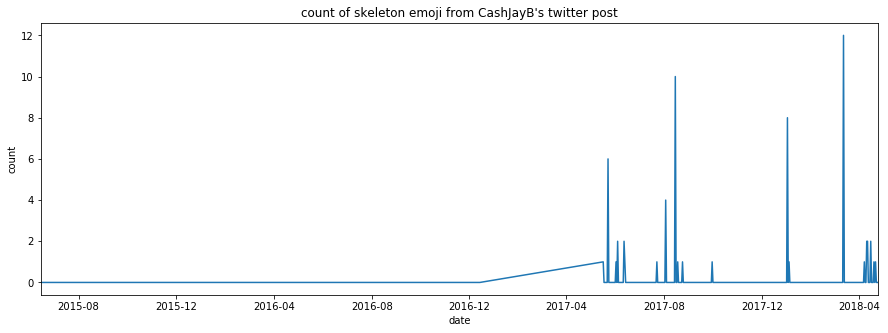

In [45]:
count_of_emoji3 = emoji_count('💀',df_CashJayB)
df_CashJayB['count_of_emoji3'] = count_of_emoji3
df_CashJayB['date'] = [i.date() for i in df_CashJayB.created_at]
grouped_by_date = df_CashJayB.groupby(df_CashJayB.date).sum()
plt.figure(figsize=(15,5))
grouped_by_date.count_of_emoji3.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of skeleton emoji from CashJayB\'s twitter post')
plt.show()

# SMDotarachi

In [130]:
ID,texts,possibly_sensitive,favorited,favorite_count,retweet_count,retweeted,truncated,created_at = get_tweet('SMDotarachi')

number of tweets: 200
number of tweets: 400
number of tweets: 599
number of tweets: 799
number of tweets: 995
number of tweets: 1191
number of tweets: 1389
number of tweets: 1587
number of tweets: 1784
number of tweets: 1984
number of tweets: 2184
number of tweets: 2382
number of tweets: 2514
number of tweets: 2514
number of tweets: 2514
number of tweets: 2514
number of tweets: 2514
number of tweets: 2514
number of tweets: 2514


In [131]:
df_SMDotarachi = pd.DataFrame({'id':ID,'texts':texts,'favorited':favorited,'favorite_count':favorite_count,'retweet_count':retweet_count,'retweeted':retweeted,'truncated':truncated,"created_at":created_at})

In [132]:
df_SMDotarachi

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated
0,2018-04-27 07:45:27,0,False,989772498899095558,1,False,RT @kimmyg0331: It’s so sad how scary bitches be,False
1,2018-04-27 07:31:38,1,False,989769022991302657,0,False,🔥🔥🤔 wonder who will support my music gear 🤷🏽‍♀...,False
2,2018-04-27 07:29:00,0,False,989768357665648641,0,False,Went to sleep early now I'm wide awake,False
3,2018-04-27 01:17:38,0,False,989674902331502592,2,False,RT @Ceddyeuro: i need a vacation but don’t got...,False
4,2018-04-27 01:17:27,0,False,989674855229476864,0,False,Yo some white girl really TRIED it today 🤦🏽‍♀️,False
5,2018-04-27 00:08:42,1,False,989657554358820864,0,False,"I'm far from perfect , I won't lead you on",False
6,2018-04-27 00:03:18,0,False,989656194309554176,0,False,You could keep that pussy I am not interested,False
7,2018-04-26 07:20:35,0,False,989403851773153282,0,False,It's crazy I been UP UP UP then lost it all TO...,False
8,2018-04-26 07:06:37,0,False,989400338322075648,0,False,I guess I get the meaning of that one song now...,False
9,2018-04-26 06:58:54,0,False,989398396904591360,0,False,Working 2 jobs is wicked...but I've procrastin...,False


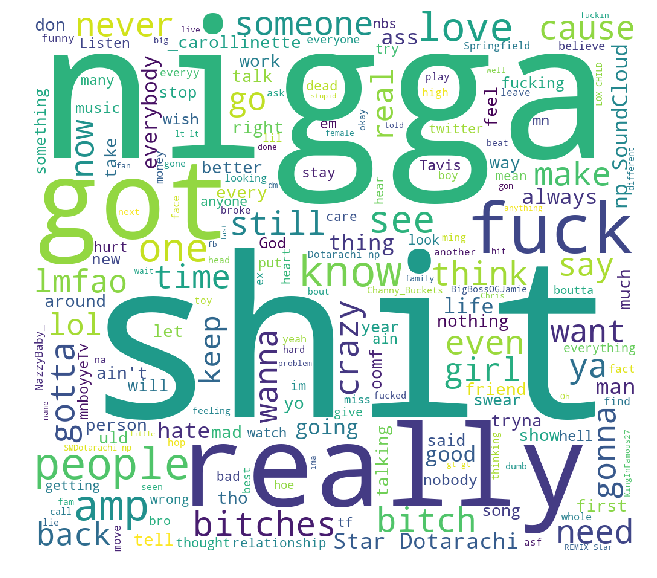

In [133]:
### word cloud 
all_texts = ''.join(texts)
all_texts = all_texts.replace('dat','')
all_texts = all_texts.replace('da','')
all_texts = all_texts.replace('Da','')
all_texts = all_texts.replace('RT','')
all_texts = all_texts.replace('https','')
all_texts = all_texts.replace('co','')
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1000, height=900, margin=2).generate(all_texts)
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [134]:
all_texts = all_texts.lower()
c = Counter(all_texts.split())
c.most_common()

[('i', 875),
 ('to', 561),
 ('you', 476),
 ('the', 414),
 ('.', 408),
 ('a', 393),
 ('me', 391),
 ('my', 384),
 ('be', 256),
 (',', 254),
 ('that', 237),
 ('in', 229),
 ('on', 220),
 ('it', 213),
 ('shit', 208),
 ('with', 204),
 ('for', 194),
 ('like', 193),
 ('is', 176),
 ('but', 172),
 ('just', 166),
 ("i'm", 163),
 ("don't", 157),
 ('this', 153),
 ('and', 151),
 ('not', 149),
 ('of', 143),
 ('so', 142),
 ('get', 139),
 ('really', 137),
 ('all', 130),
 ('got', 129),
 ('up', 127),
 ('they', 123),
 ('your', 120),
 ('out', 120),
 ('no', 119),
 ('do', 115),
 ('was', 114),
 ('people', 111),
 ('fuck', 106),
 ('&amp;', 105),
 ('niggas', 104),
 ('know', 104),
 ('when', 101),
 ('if', 98),
 ('love', 92),
 ('can', 86),
 ('one', 85),
 ('see', 83),
 ('about', 80),
 ('star', 77),
 ('what', 73),
 ('why', 71),
 ('gotta', 70),
 ('we', 69),
 ('by', 69),
 ('have', 67),
 ('even', 67),
 ('bitches', 67),
 ('bitch', 66),
 ('at', 66),
 ('never', 65),
 ('cause', 64),
 ('from', 63),
 ('need', 63),
 ("it's", 6

In [135]:
print(word_frequency('bitch') + word_frequency('bitches'))
print(c['bitch'] + c['bitches'])
print(word_frequency('fuck') + word_frequency('fucking') + word_frequency('fucked') + word_frequency('fuckin'))
print(c['fuck']+c['fucking']+c['fucked']+c['fuckin'])
print(word_frequency('niggas') + word_frequency('nigga') + word_frequency('niggz'))
print(c['niggas']+c['nigga']+c['niggz'])
print(word_frequency('shyt') + word_frequency('shit') + word_frequency('shits'))
print(c['shyt']+c['shit']+c['shits'])
print(word_frequency('ass') + word_frequency('asshole'))
print(c['ass']+c['asshole'])

0.060859188544152745
133
0.06483691328560064
155
0.07000795544948289
153
0.09626093874303898
217
0.021877486077963405
52


In [14]:
emojis = extract_emojis(all_texts)
emojis_text = emoji.demojize(emojis)
emojis_list = []
for i in emojis:
    emojis_list.append(i)
c_emojis_list = Counter(emojis_list)
list(c_emojis_list.items())  
df_emoji = pd.DataFrame(list(c_emojis_list.items()),columns=['emoji','count'])
df_emoji['frequency'] = df_emoji['count'] / df_emoji['count'].sum()
df_emoji = df_emoji.sort_values('count',ascending=False)
df_emoji = df_emoji.reset_index(drop=True)
df_emoji.style.format({
    'frequency': '{:,.2%}'.format,})

,emoji,count,frequency
0,😂,554,26.63%
1,💯,196,9.42%
2,♀,145,6.97%
3,😍,124,5.96%
4,🤦,93,4.47%
5,😓,87,4.18%
6,🤷,66,3.17%
7,🎶,51,2.45%
8,🔥,40,1.92%
9,👌,39,1.88%


In [20]:
df_SMDotarachi['date'] = [i.date() for i in df_SMDotarachi.created_at]
grouped_by_date = df_SMDotarachi.groupby(df_SMDotarachi.date).count()
grouped_by_date.sort_values('created_at',ascending=False)

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated
date,,,,,,,,
2018-03-21,190,190,190,190,190,190,190,190
2018-03-20,136,136,136,136,136,136,136,136
2018-01-02,109,109,109,109,109,109,109,109
2018-04-17,83,83,83,83,83,83,83,83
2015-04-15,80,80,80,80,80,80,80,80
2015-04-22,75,75,75,75,75,75,75,75
2018-03-04,63,63,63,63,63,63,63,63
2018-03-22,63,63,63,63,63,63,63,63
2018-03-07,57,57,57,57,57,57,57,57


In [24]:
grouped_by_date[30:]

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated
date,,,,,,,,
2015-04-27,2,2,2,2,2,2,2,2
2015-04-28,7,7,7,7,7,7,7,7
2015-04-29,31,31,31,31,31,31,31,31
2015-04-30,27,27,27,27,27,27,27,27
2015-05-01,4,4,4,4,4,4,4,4
2015-05-02,6,6,6,6,6,6,6,6
2015-05-03,2,2,2,2,2,2,2,2
2015-05-05,9,9,9,9,9,9,9,9
2015-05-07,4,4,4,4,4,4,4,4


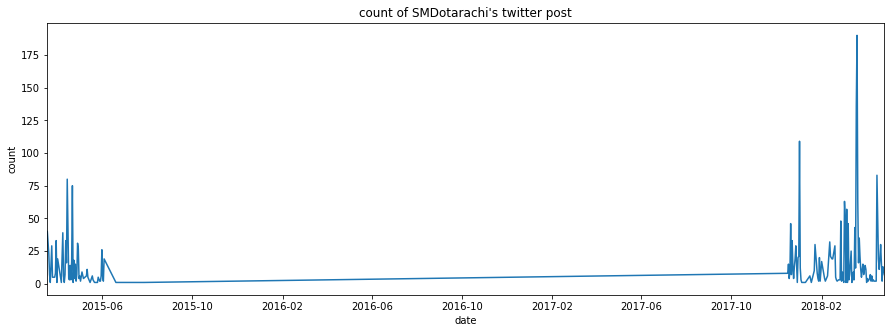

In [16]:
plt.figure(figsize=(15,5))
grouped_by_date.created_at.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of SMDotarachi\'s twitter post')
plt.show()

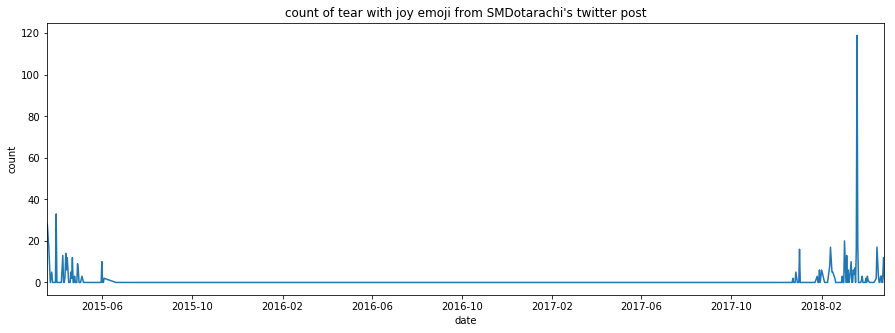

In [28]:
count_of_emoji2 = emoji_count('😂',df_SMDotarachi)
df_SMDotarachi['count_of_emoji2'] = count_of_emoji2
df_SMDotarachi['date'] = [i.date() for i in df_SMDotarachi.created_at]
grouped_by_date = df_SMDotarachi.groupby(df_SMDotarachi.date).sum()
plt.figure(figsize=(15,5))
grouped_by_date.count_of_emoji2.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of tear with joy emoji from SMDotarachi\'s twitter post')
plt.show()

In [86]:
df_SMDotarachi

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,date,count_of_emoji2
0,2018-04-25 18:09:43,0,False,989204827073851394,0,False,I work both jobs off no sleep today . 🤷🏽‍♀️ Le...,False,2018-04-25,0
1,2018-04-25 04:08:47,0,False,988993195571908609,0,False,Mixed emotions 🤦🏽‍♀️ stuck in between anger an...,False,2018-04-25,0
2,2018-04-25 04:07:37,0,False,988992903128154113,0,False,Like it's crazy I have to put my people I love...,False,2018-04-25,0
3,2018-04-25 04:06:53,0,False,988992717232451584,0,False,😓 I hate this feeling . To really miss someone...,False,2018-04-25,0
4,2018-04-25 01:42:35,0,False,988956406232571904,0,False,"Cause the struggle , I ain't stopping i need e...",False,2018-04-25,0
5,2018-04-25 00:33:41,0,False,988939065256005632,0,False,I push people away for my own safety 💯 gotta a...,False,2018-04-25,0
6,2018-04-25 00:25:35,0,False,988937026748772352,0,False,I hate humans ...,False,2018-04-25,0
7,2018-04-25 00:25:13,0,False,988936935006752768,0,False,I gotta keep my head above water 💯,False,2018-04-25,0
8,2018-04-25 00:12:09,0,False,988933648178204677,0,False,One of my co-workers says she can't work Wedne...,False,2018-04-25,4
9,2018-04-25 00:10:41,0,False,988933276726415360,4,False,RT @RealChris2x_: I only trust myself cause wh...,False,2018-04-25,0


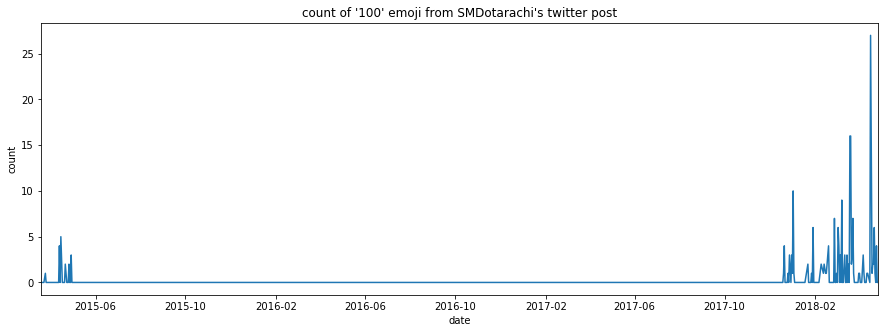

In [30]:
count_of_emoji1 = emoji_count('💯',df_SMDotarachi)
df_SMDotarachi['count_of_emoji1'] = count_of_emoji1
df_SMDotarachi['date'] = [i.date() for i in df_SMDotarachi.created_at]
grouped_by_date = df_SMDotarachi.groupby(df_SMDotarachi.date).sum()
plt.figure(figsize=(15,5))
grouped_by_date.count_of_emoji1.plot()
plt.ylabel('count')
plt.xlabel('date')
plt.title('count of \'100\' emoji from SMDotarachi\'s twitter post')
plt.show()

In [90]:
df_SMDotarachi

,created_at,favorite_count,favorited,id,retweet_count,retweeted,texts,truncated,date,count_of_emoji2,count_of_emoji1
0,2018-04-25 18:09:43,0,False,989204827073851394,0,False,I work both jobs off no sleep today . 🤷🏽‍♀️ Le...,False,2018-04-25,0,0
1,2018-04-25 04:08:47,0,False,988993195571908609,0,False,Mixed emotions 🤦🏽‍♀️ stuck in between anger an...,False,2018-04-25,0,0
2,2018-04-25 04:07:37,0,False,988992903128154113,0,False,Like it's crazy I have to put my people I love...,False,2018-04-25,0,0
3,2018-04-25 04:06:53,0,False,988992717232451584,0,False,😓 I hate this feeling . To really miss someone...,False,2018-04-25,0,0
4,2018-04-25 01:42:35,0,False,988956406232571904,0,False,"Cause the struggle , I ain't stopping i need e...",False,2018-04-25,0,0
5,2018-04-25 00:33:41,0,False,988939065256005632,0,False,I push people away for my own safety 💯 gotta a...,False,2018-04-25,0,2
6,2018-04-25 00:25:35,0,False,988937026748772352,0,False,I hate humans ...,False,2018-04-25,0,0
7,2018-04-25 00:25:13,0,False,988936935006752768,0,False,I gotta keep my head above water 💯,False,2018-04-25,0,1
8,2018-04-25 00:12:09,0,False,988933648178204677,0,False,One of my co-workers says she can't work Wedne...,False,2018-04-25,4,0
9,2018-04-25 00:10:41,0,False,988933276726415360,4,False,RT @RealChris2x_: I only trust myself cause wh...,False,2018-04-25,0,0


In [249]:
# demojize
for i in range(len(df_emoji)):
    df_emoji.emoji[i] = emoji.demojize(df_emoji.emoji[i])
df_emoji.head(10)


C:\Users\apple\Anaconda3\envs\dlWorks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,emoji,count
0,:smiling_face_with_horns:,266
1,:double_exclamation_mark:,6
2,:gem_stone:,1
3,:t-shirt:,2
4,:evergreen_tree:,1
5,:kiss:,2
6,:locked_with_key:,2
7,:flushed_face:,15
8,:lemon:,1
9,:ATM_sign:,4


In [ ]:
df_TyquanAssassin['texts'] = list(map(emoji.demojize ,df_TyquanAssassin['texts']))
df_TyquanAssassin.to_csv('tweets_TyquanAssassin.csv')

In [73]:
df_QC_MrSwapItOut['texts'] = list(map(emoji.demojize ,df_QC_MrSwapItOut['texts']))
df_QC_MrSwapItOut.to_csv('tweets_QC_MrSwapItOut.csv')

In [74]:
df_CashJayB['texts'] = list(map(emoji.demojize ,df_CashJayB['texts']))
df_CashJayB.to_csv('tweets_CashJayB.csv')

In [75]:
df_SMDotarachi['texts'] = list(map(emoji.demojize ,df_SMDotarachi['texts']))
df_SMDotarachi.to_csv('tweets_SMDotarachi.csv')

In [9]:

df = pd.read_csv('all_tweet_data.csv',encoding = "ISO-8859-1")

In [11]:
df.textsts

0        RT @_niyyy: I??m not who I once was and I??m s...
1                             NBA YoungBoy x You The One ?
2                           @RichieJerk6200_ That been out
3        Put On A Front Just To Hide The Pain ? Im In T...
4        RT @HaleyyMarie_: I??m tired asl ? https://t.c...
5                        NBA YoungBoy x Letter To Jania ??
6        RT @LilBubbaFrmTW: I want money n respect fuck...
7        Everyday Im Still Learning &amp; Still Wonderi...
8        I Kno Blood Nem Riding For Me ? They Out Here ...
9        RT @maceoxo: i be hurt af when somebody turns ...
10        RT @JayesYourDrug: Month https://t.co/yAc0gmGbZ7
11       Im Not Getting Close To Nobody People Wake Up ...
12       If You Got Anything Real Make Sure You Don't T...
13       RT @iamjakyrick: You put me through so much pa...
14       RT @KFineAsss: Was Trynna Be About You But Yee...
15       RT @sighbrattt: I miss you but you ain??t you ...
16       RT @CaardiB: better act like you care before I.